In [2]:
# Linear Regression in Python WITHOUT Scikit-Learn
# https://medium.com/we-are-orb/linear-regression-in-python-without-scikit-learn-50aef4b8d122

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# from numpy import genfromtxt
# this is your 'bad' data set from github
my_data = np.genfromtxt('./data/medium_articles_art1_linear_regression.csv', delimiter=',')

In [16]:
# [ Setup compute functions ]

# Cost functon
def computeCost(X, y, theta):
    # "@" means matrix multiplication of arrays. 
    # If we want to use * for multiplication 
    # we will have to convert all arrays to matrices
    inner = np.power(((X @ theta.T) - y), 2) 
    return np.sum(inner) / (2 * len(X))

# Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        # you don't need the extra loop - this can be vectorize
        # making it much faster and simpler
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
    return (theta, cost)



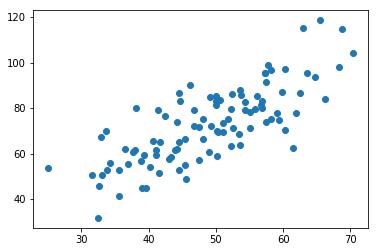

In [15]:
# [ Setup x and y ]

# x is columns
X = my_data[:, 0].reshape(-1,1) # -1 tells numpy to figure out the dimension by itself
ones = np.ones([X.shape[0], 1])
X = np.concatenate([ones, X],1)
#X = np.hstack([ones, X]) # hstack Stack arrays in sequence horizontally (column wise)

# y is a columns vector
y = my_data[:, 1].reshape(-1,1)

# Display the raw data
plt.scatter(my_data[:, 0].reshape(-1,1), y)

[[1.03533399 1.45914293]] 56.0419737779817


array([[ 48.46090134],
       [ 78.99267744],
       [ 90.81692096],
       [ 70.30907797],
       [ 88.31135345],
       [ 81.49566843],
       [ 77.21980806],
       [ 58.37901893],
       [ 71.22746553],
       [ 77.7133161 ],
       [ 67.30921217],
       [ 80.34213783],
       [ 65.47699463],
       [ 85.91144686],
       [ 83.80843864],
       [ 72.46897274],
       [ 66.24034049],
       [ 89.01775224],
       [ 67.59945559],
       [ 57.67461891],
       [ 97.61573701],
       [ 96.48670349],
       [ 70.3172039 ],
       [ 61.70013903],
       [ 76.68487198],
       [ 87.66584925],
       [ 84.6588204 ],
       [ 93.85953051],
       [ 69.23220097],
       [ 74.80487319],
       [ 77.23760872],
       [ 52.93388178],
       [ 62.95621935],
       [ 85.90571154],
       [ 84.94254224],
       [ 67.33956319],
       [ 91.35076979],
       [ 49.32396464],
       [ 54.20067971],
       [ 56.00949946],
       [ 66.04833501],
       [ 64.24289989],
       [ 74.09921049],
       [ 65

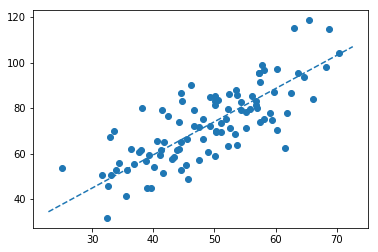

In [14]:
# [ Set up arguments for running GD method ]
alpha = 0.0001  # small alpha
iters = 1000    # iterate times
theta = np.array([[1.0, 1.0]])  # theta is a row vector

# call functions to calculate Gradient Descent & Cost
g, cost = gradientDescent(X, y, theta, alpha, iters)  
print(g, cost)

# Plotting 
plt.scatter(my_data[:, 0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation
plt.plot(x_vals, y_vals, '--')

X @ g.T